# Uppgift 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly_express as px

## Studie av hur Personal och kostnader beroende på Län

### Andel av lärare med högskole-examen per län

In [8]:
# Reads the excel file
df_highschool = pd.read_excel("..\data\Gymnasieskola - Personalstatistik 2022 Län.xlsx", skiprows=8)
df_highschool.head()

,Län,Läns-kod,Lärare och rektor,Rektor,Lärare,Andel kvinnor,Andel med pedagogisk högskole-examen,Andel med specialped. högskole-examen,Elever per lärare,Studie- och yrkesvägledare (SYV),Elever per SYV,Andel tillsvidare-anställda
0,Kronobergs län,7,705.1,21.8,683.3,48.5,80.4,3.4,11.4,14.8,527.0,92.7
1,Gävleborgs län,21,916.7,28.7,888.0,50.0,77.0,2.4,11.2,25.5,391.1,92.1
2,Kalmar län,8,805.8,31.2,774.6,48.6,80.4,3.1,11.0,22.5,380.5,92.1
3,Jönköpings län,6,1257.2,49.4,1207.8,50.8,79.7,3.9,11.1,27.9,479.3,91.6
4,Uppsala län,3,1084.8,28.0,1056.8,54.3,83.7,3.1,12.3,32.8,397.3,91.5


In [45]:
# Sort the excel file and makes it a float
df_sorted_highschool = df_highschool.sort_values(by="Andel med pedagogisk högskole-examen", key=lambda col: col.astype(str).str.replace('.', '').astype(float), ascending=False)
df_sorted_highschool.head()

,Län,Läns-kod,Lärare och rektor,Rektor,Lärare,Andel kvinnor,Andel med pedagogisk högskole-examen,Andel med specialped. högskole-examen,Elever per lärare,Studie- och yrkesvägledare (SYV),Elever per SYV,Andel tillsvidare-anställda
9,Hallands län,13,1105.1,45.8,1059.2,53.0,86.0,4.3,11.7,30.3,410.3,89.6
12,Stockholms län,1,5789.1,166.3,5622.8,53.3,85.0,2.9,15.1,145.7,581.8,89.4
14,Västra Götalands län,14,5033.7,195.1,4838.6,51.9,84.0,3.7,12.4,80.7,741.5,89.3
4,Uppsala län,3,1084.8,28.0,1056.8,54.3,83.7,3.1,12.3,32.8,397.3,91.5
10,Skåne län,12,4006.9,131.4,3875.4,51.8,83.1,4.8,12.6,106.9,457.2,89.5


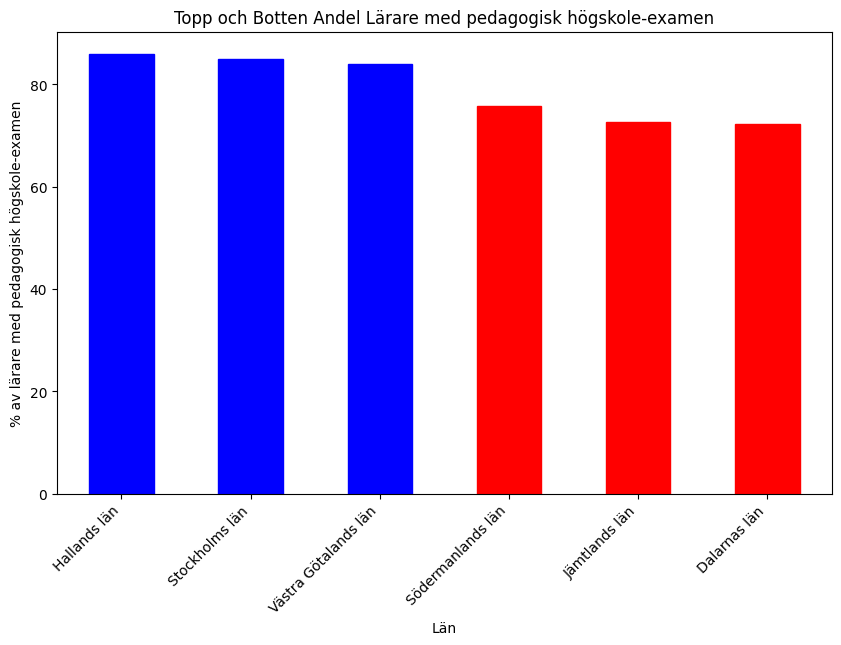

In [49]:
# combinding top 3 and bottom 3 so we kan place in same diagram
df_combined = pd.concat([df_sorted_highschool.head(3), df_sorted_highschool.tail(3)])

# Make a bar diagram
ax = df_combined.plot(kind="bar", y="Andel med pedagogisk högskole-examen", x="Län", figsize=(10, 6), rot=0)

# help from chatgpt
colors = ['b']*3 + ['r']*3

# Loop to give the color of the bar
for i, bar in enumerate(ax.patches):
    bar.set_color(colors[i])

ax.set_title("Topp och Botten Andel Lärare med pedagogisk högskole-examen")
ax.set_xlabel("Län")
ax.set_ylabel("% av lärare med pedagogisk högskole-examen")
ax.legend().set_visible(False)
plt.xticks(rotation=45, ha="right")
plt.tight_layout
plt.show()

##### Grafen visar en inte jätte stor skillnad men ett litet övertag av lärare med högkole utbildning i län kopplat till större städer

### Graf över antal Elever per Lärare

In [26]:
# Reads the excel file
df_student_per_teacher = pd.read_excel("..\data\Gymnasieskola - Personalstatistik 2022 Län.xlsx", skiprows=8)
df_student_per_teacher.head()

,Län,Läns-kod,Lärare och rektor,Rektor,Lärare,Andel kvinnor,Andel med pedagogisk högskole-examen,Andel med specialped. högskole-examen,Elever per lärare,Studie- och yrkesvägledare (SYV),Elever per SYV,Andel tillsvidare-anställda
0,Kronobergs län,7,705.1,21.8,683.3,48.5,80.4,3.4,11.4,14.8,527.0,92.7
1,Gävleborgs län,21,916.7,28.7,888.0,50.0,77.0,2.4,11.2,25.5,391.1,92.1
2,Kalmar län,8,805.8,31.2,774.6,48.6,80.4,3.1,11.0,22.5,380.5,92.1
3,Jönköpings län,6,1257.2,49.4,1207.8,50.8,79.7,3.9,11.1,27.9,479.3,91.6
4,Uppsala län,3,1084.8,28.0,1056.8,54.3,83.7,3.1,12.3,32.8,397.3,91.5


In [46]:
# Sort the excel file and makes it a float
df_sorted_stu_per_teacher = df_student_per_teacher.sort_values(by="Elever per lärare", key=lambda col: col.astype(str).str.replace('.', '').astype(float), ascending=False)
df_sorted_stu_per_teacher.head()

,Län,Läns-kod,Lärare och rektor,Rektor,Lärare,Andel kvinnor,Andel med pedagogisk högskole-examen,Andel med specialped. högskole-examen,Elever per lärare,Studie- och yrkesvägledare (SYV),Elever per SYV,Andel tillsvidare-anställda
12,Stockholms län,1,5789.1,166.3,5622.8,53.3,85.0,2.9,15.1,145.7,581.8,89.4
10,Skåne län,12,4006.9,131.4,3875.4,51.8,83.1,4.8,12.6,106.9,457.2,89.5
8,Södermanlands län,4,866.5,26.5,840.0,52.7,75.7,2.7,12.6,19.0,557.2,90.1
14,Västra Götalands län,14,5033.7,195.1,4838.6,51.9,84.0,3.7,12.4,80.7,741.5,89.3
4,Uppsala län,3,1084.8,28.0,1056.8,54.3,83.7,3.1,12.3,32.8,397.3,91.5


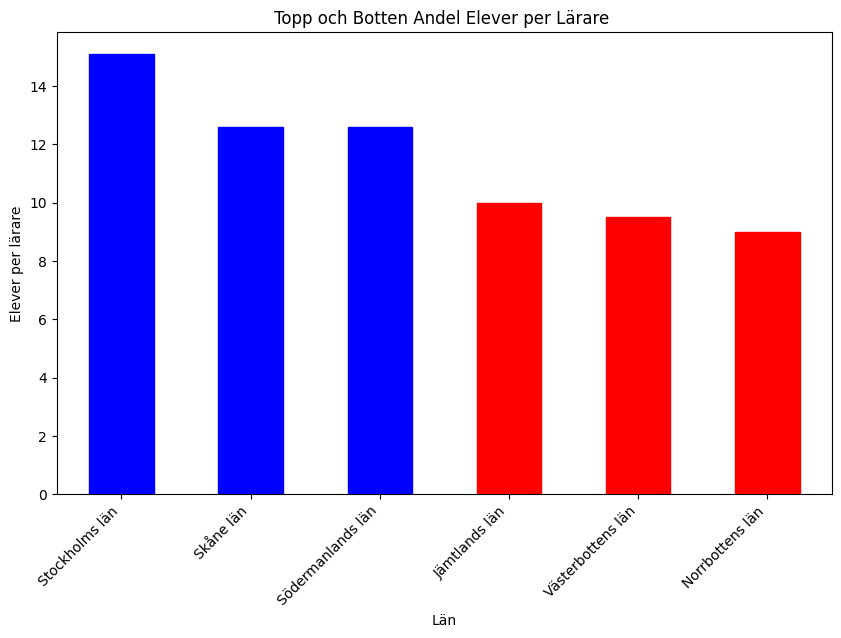

In [50]:
# combinding top 3 and bottom 3 so we kan place in same diagram
df_combined = pd.concat([df_sorted_stu_per_teacher.head(3), df_sorted_stu_per_teacher.tail(3)])

# Make a bar diagram
ax = df_combined.plot(kind="bar", y="Elever per lärare", x="Län", figsize=(10, 6), rot=0)


colors = ['b']*3 + ['r']*3

# Loop to give the color of the bar
for i, bar in enumerate(ax.patches):
    bar.set_color(colors[i])

ax.set_title("Topp och Botten Andel Elever per Lärare ")
ax.set_xlabel("Län")
ax.set_ylabel("Elever per lärare")
ax.legend().set_visible(False)

plt.xticks(rotation=45, ha="right")
plt.tight_layout
plt.show()

##### Här ser vi en större skillnad just beroende på vart länet ligger där norrland har tydligt mindre Elever per Lärare och med dessa två diagram så känns det som att kraven för att vara lärare är större i stora städer


### Kostand per Elev (Län)

In [43]:
# Reads the excel file
df_cost = pd.read_excel("..\data\Gymnasieskola - Kostnader per län 2022 Län.xlsx", skiprows=7)
df_cost.head()

,Län,Läns-kod,Typ av huvudman,Genomsnittligt elevantal,Totalt,Undervisning,Totalt per elev,Undervisning per elev,Lokaler per elev,Måltider per elev,Lärverktyg per elev,Elevhälsa per elev,Övrigt per elev
0,Jämtlands län,23,Kommunal,619,136361,68217,220300,110200,23900,8100,18400,3420,56300
1,Norrbottens län,25,Kommunal,5973,978573,480491,163800,80500,31600,8800,14100,5310,23500
2,Västerbottens län,24,Kommunal,7396,1140829,587766,154300,79500,25000,6400,14000,4160,25200
3,Värmlands län,17,Kommunal,6773,1002396,520551,148000,76900,21600,7100,14600,4450,23400
4,Dalarnas län,20,Kommunal,7330,1075999,574914,146800,78400,24500,6300,12900,3740,20900


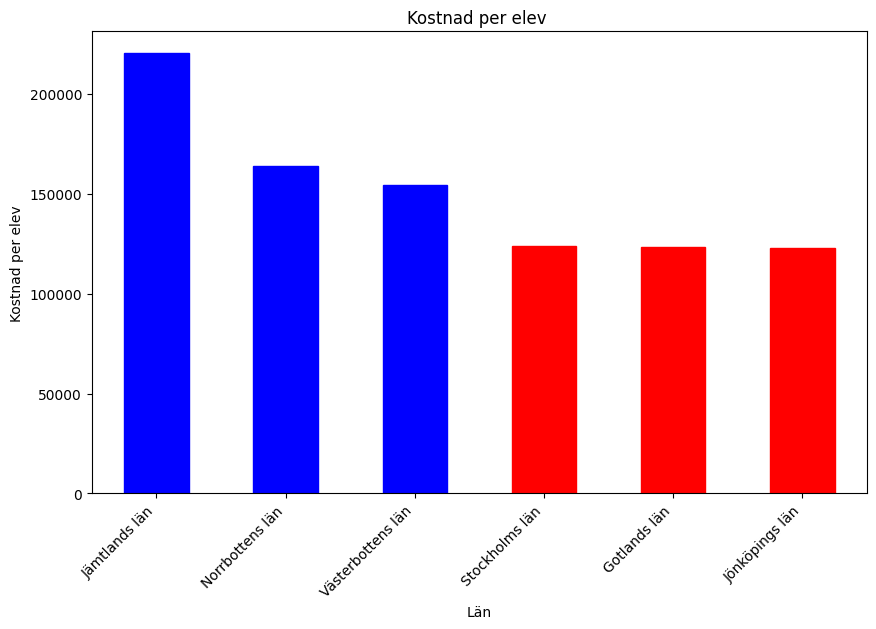

In [52]:
# combinding top 3 and bottom 3 so we kan place in same diagram
df_combined = pd.concat([df_cost.head(3), df_cost.tail(3)])

# Make a bar diagram
ax = df_combined.plot(kind="bar", y="Totalt per elev", x="Län", figsize=(10, 6), rot=0)


colors = ['b']*3 + ['r']*3

# Loop to give the color of the bar
for i, bar in enumerate(ax.patches):
    bar.set_color(colors[i])

ax.set_title("Kostnad per elev ")
ax.set_xlabel("Län")
ax.set_ylabel("Kostnad per elev")
ax.legend().set_visible(False)

plt.xticks(rotation=45, ha="right")
plt.tight_layout
plt.show()

##### Det vi sen märker är att pengar per elev är betydligt högre i norrländska län och är en förklaring varför det är betydligt mindre elever per lärare just där